# Intel Image Classification

## Importing Libraries

In [26]:
# Imports
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.preprocessing import LabelEncoder
import random
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from PIL import Image
import PIL.Image

## Data load and Data visualization (Images)

Categories (6): ['buildings', 'forest', 'glacier', 'mountain', 'sea', 'street']

For training data:


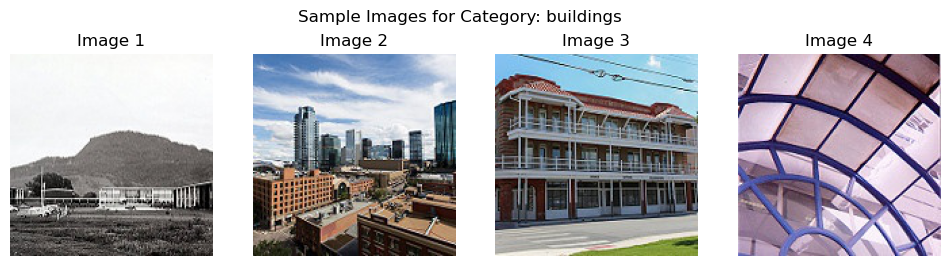

Number of images in buildings : 2191


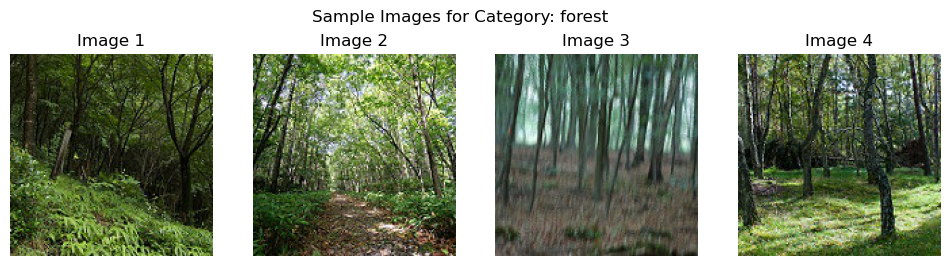

Number of images in forest : 2271


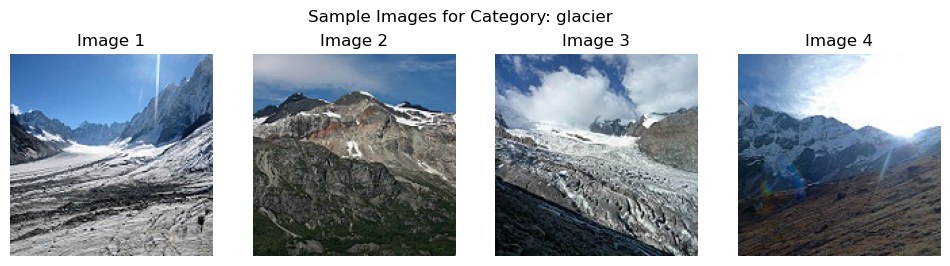

Number of images in glacier : 2404


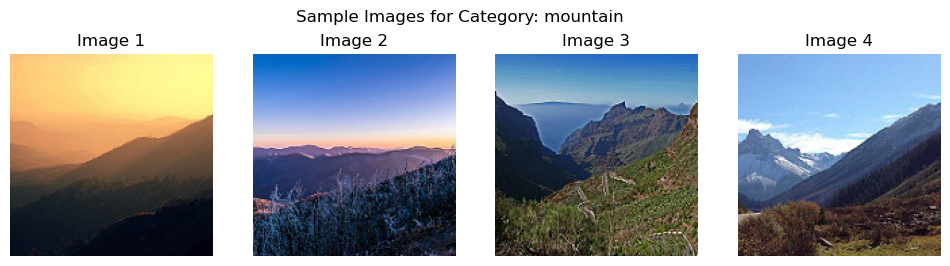

Number of images in mountain : 2512


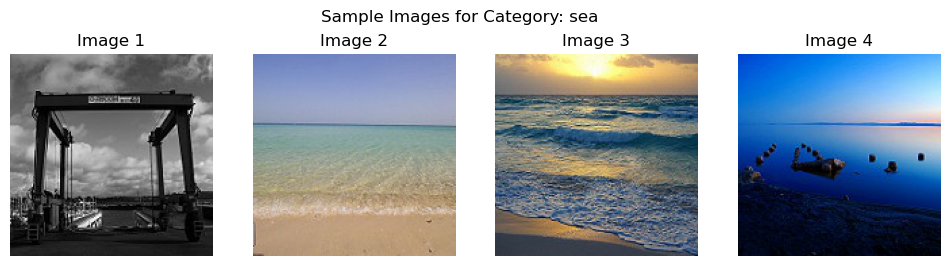

Number of images in sea : 2274


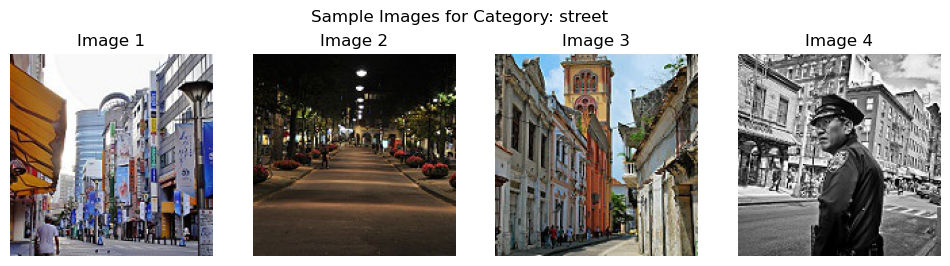

Number of images in street : 2382
Total number of images for training: 14034

--------------------------------------------------

For testing data:


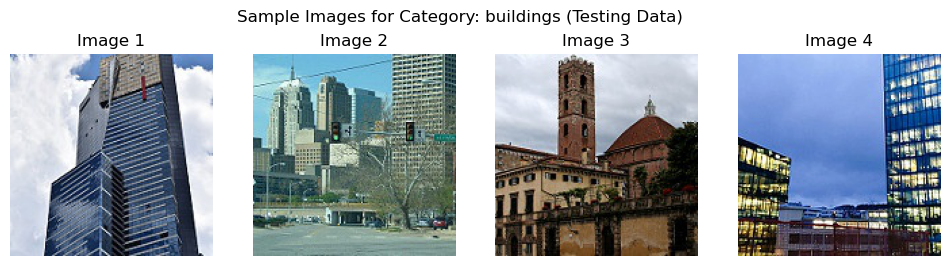

Number of images in buildings for testing data: 437


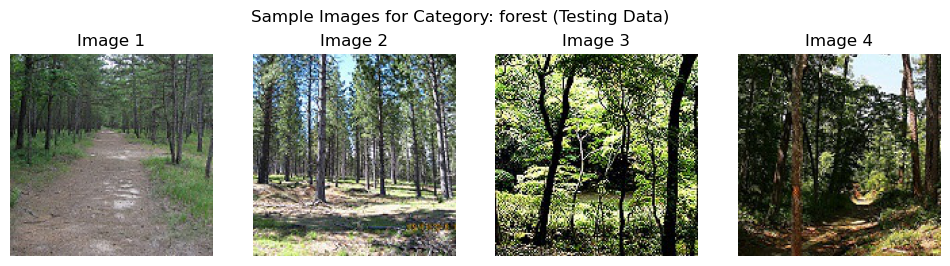

Number of images in forest for testing data: 474


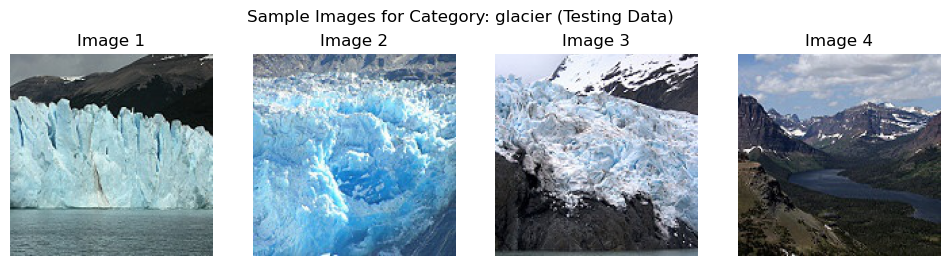

Number of images in glacier for testing data: 553


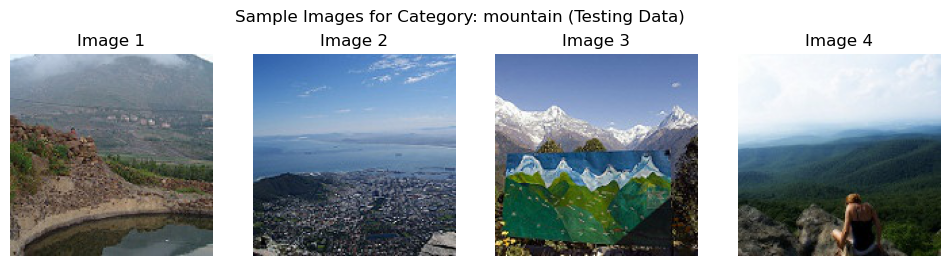

Number of images in mountain for testing data: 525


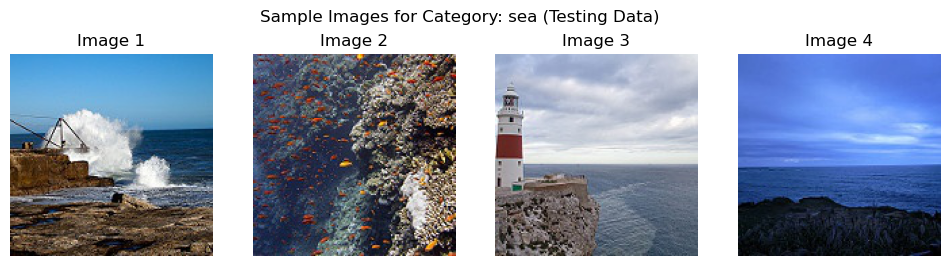

Number of images in sea for testing data: 510


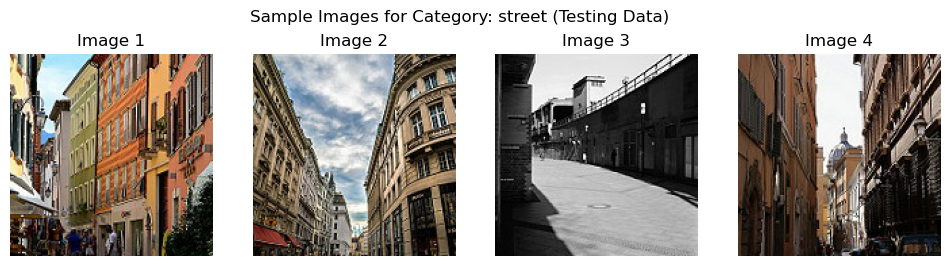

Number of images in street for testing data: 501
Total number of images for testing: 3000


In [27]:

# Define the paths to the training and testing data directories
Data_train = "seg_train/seg_train"
Data_test = "seg_test/seg_test"

# Get the list of all the categories (e.g., types of images)
categories = os.listdir(Data_train)

# Print the list of categories and the total number of categories
print("Categories (" + str(len(categories)) + "):", categories)

# Initialize lists to store the number of images in each category for training and testing data
train_counts = []
test_counts = []

# For training data
print("\nFor training data:")
# Initialize a variable to keep track of the total number of training images
total_train = 0

# Loop through each category to count the number of images in each category
for category in categories:
    # Get the list of image files in the current category
    category_path = os.path.join(Data_train, category)
    category_images = os.listdir(category_path)
    
    # Count the number of images in the current category
    num_images_in_category = len(category_images)
    
    # Display the first few images from each category for illustration
    num_to_display = min(4, num_images_in_category)
    plt.figure(figsize=(12, 3))
    plt.suptitle(f"Sample Images for Category: {category}")
    for i in range(num_to_display):
        image_path = os.path.join(category_path, category_images[i])
        img = mpimg.imread(image_path)
        plt.subplot(1, num_to_display, i + 1)
        plt.imshow(img)
        plt.title(f"Image {i + 1}")
        plt.axis('off')
    plt.show()
    
    # Print the category and the number of images in that category
    print("Number of images in", category, ":", num_images_in_category)
    
    # Update the total number of training images
    total_train += num_images_in_category

    # Store the count of images in the current category
    train_counts.append(num_images_in_category)

# Print the total number of training images
print("Total number of images for training:", total_train)

# Separator
print("\n--------------------------------------------------\n")

# For testing data
print("For testing data:")
# Initialize a variable to keep track of the total number of testing images
total_test = 0

# Loop through each category to count the number of images in each category for testing data
for category in categories:
    # Get the list of image files in the current category for testing data
    category_path = os.path.join(Data_test, category)
    category_images = os.listdir(category_path)
    
    # Count the number of images in the current category for testing data
    num_images_in_category = len(category_images)
    
    # Display the first few images from each category for illustration
    num_to_display = min(4, num_images_in_category)
    plt.figure(figsize=(12, 3))
    plt.suptitle(f"Sample Images for Category: {category} (Testing Data)")
    for i in range(num_to_display):
        image_path = os.path.join(category_path, category_images[i])
        img = mpimg.imread(image_path)
        plt.subplot(1, num_to_display, i + 1)
        plt.imshow(img)
        plt.title(f"Image {i + 1}")
        plt.axis('off')
    plt.show()
    
    # Print the category and the number of images in that category for testing data
    print("Number of images in", category, "for testing data:", num_images_in_category)
    
    # Update the total number of testing images
    total_test += num_images_in_category

    # Store the count of images in the current category for testing data
    test_counts.append(num_images_in_category)

# Print the total number of testing images
print("Total number of images for testing:", total_test)

## Data Visualization (Graphs)

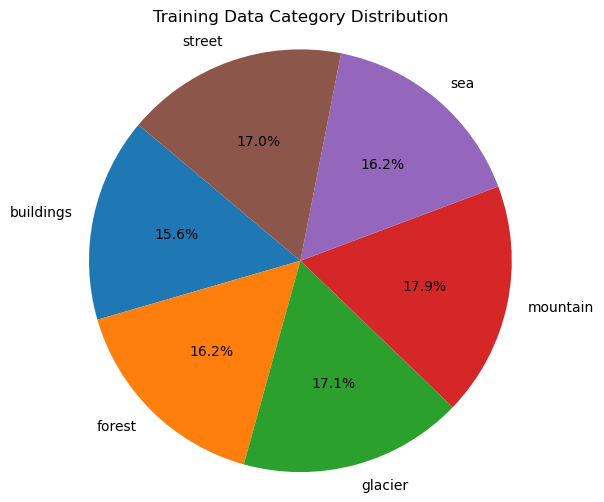

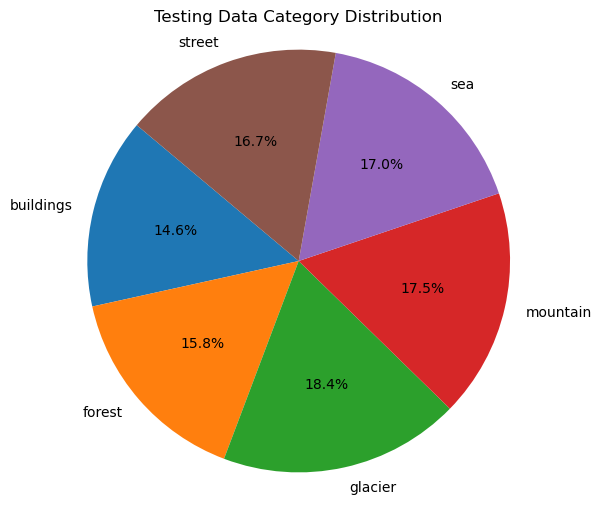

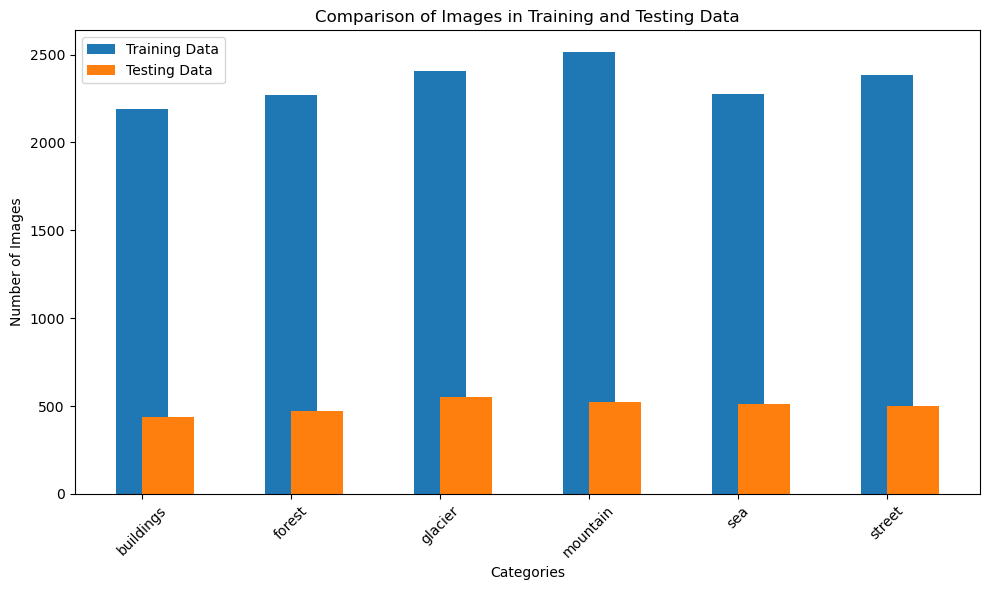

In [28]:
# Create a pie chart for training data
plt.figure(figsize=(6, 6))
plt.pie(train_counts, labels=categories, autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.title('Training Data Category Distribution')
plt.show()

# Create a pie chart for testing data
plt.figure(figsize=(6, 6))
plt.pie(test_counts, labels=categories, autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.title('Testing Data Category Distribution')
plt.show()

# Create a bar graph to compare the number of images between training and testing data
plt.figure(figsize=(10, 6))
width = 0.35
x = range(len(categories))
plt.bar(x, train_counts, width, label='Training Data', align='center')
plt.bar(x, test_counts, width, label='Testing Data', align='edge')
plt.xlabel('Categories')
plt.ylabel('Number of Images')
plt.title('Comparison of Images in Training and Testing Data')
plt.xticks(x, categories, rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

## Label Encoding

In [29]:
# Label Encoding for the categories
le = LabelEncoder()
le.fit(categories)
print("Categories:", categories)
print("Encoded Labels:", le.transform(categories))


Categories: ['buildings', 'forest', 'glacier', 'mountain', 'sea', 'street']
Encoded Labels: [0 1 2 3 4 5]


## Data Preprocessing

In [31]:
# Data Preprocessing

# Create an ImageDataGenerator for training data with rescaling
train_datagen = ImageDataGenerator(rescale=1./255)

# Create an ImageDataGenerator for testing data with rescaling
test_datagen = ImageDataGenerator(rescale=1./255)

# Create a generator for training data
train_generator = train_datagen.flow_from_directory(
        Data_train,             # Directory containing training data
        target_size=(224, 224),  # Target image size
        batch_size=32,           # Batch size
        class_mode='categorical' # Type of labels (categorical for multi-class classification)
)

# Create a generator for testing data
test_generator = test_datagen.flow_from_directory(
        Data_test,              # Directory containing testing data
        target_size=(224, 224),  # Target image size
        batch_size=32,           # Batch size
        class_mode='categorical' # Type of labels (categorical for multi-class classification)
)

# Load the next batch of training data images and their corresponding labels
train_images, train_labels = train_generator.next()

# Load the next batch of testing data images and their corresponding labels
test_images, test_labels = test_generator.next()

Found 14034 images belonging to 6 classes.
Found 3000 images belonging to 6 classes.


## Implementing CNN Model

In [32]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(224, 224, 3)), # 32 filters, 3x3 kernel size
    tf.keras.layers.MaxPooling2D(2, 2), # 2x2 pool size
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'), # 64 filters, 3x3 kernel size
    tf.keras.layers.MaxPooling2D(2,2), # 2x2 pool size
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'), # 128 filters, 3x3 kernel size
    tf.keras.layers.MaxPooling2D(2,2), # 2x2 pool size
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'), # 128 filters, 3x3 kernel size
    tf.keras.layers.MaxPooling2D(2,2), # 2x2 pool size
    tf.keras.layers.Flatten(), # Flatten the input
    tf.keras.layers.Dense(512, activation='relu'), # 512 neurons in the hidden layer
    tf.keras.layers.Dense(6, activation='softmax') # 6 output neurons for 6 classes
])

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Print the model summary
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 111, 111, 32)     0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 52, 52, 128)       73856     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 26, 26, 128)     

## Training the Model

In [41]:
from keras.callbacks import ReduceLROnPlateau

# Train the model
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=2, min_lr=0.00001)

history = model.fit(
    train_generator,
    validation_data = test_generator,
    epochs = 20,
    steps_per_epoch = 100,
    validation_steps = 50,
    verbose = 1,
    callbacks = [reduce_lr]
)


Epoch 1/20
100/100 [==============================] - 128s 1s/step - loss: 0.7794 - accuracy: 0.6925 - val_loss: 0.7462 - val_accuracy: 0.7300 - lr: 0.0010
Epoch 2/20
100/100 [==============================] - 135s 1s/step - loss: 0.7139 - accuracy: 0.7304 - val_loss: 0.7519 - val_accuracy: 0.7069 - lr: 0.0010
Epoch 3/20
100/100 [==============================] - 117s 1s/step - loss: 0.6961 - accuracy: 0.7328 - val_loss: 0.7183 - val_accuracy: 0.7294 - lr: 0.0010
Epoch 4/20
100/100 [==============================] - 85s 846ms/step - loss: 0.6163 - accuracy: 0.7694 - val_loss: 0.5827 - val_accuracy: 0.7775 - lr: 0.0010
Epoch 5/20
100/100 [==============================] - 84s 836ms/step - loss: 0.5878 - accuracy: 0.7866 - val_loss: 0.6581 - val_accuracy: 0.7544 - lr: 0.0010
Epoch 6/20
100/100 [==============================] - 85s 853ms/step - loss: 0.5645 - accuracy: 0.7931 - val_loss: 0.6632 - val_accuracy: 0.7487 - lr: 0.0010
Epoch 7/20
100/100 [==============================] - 82s 

## Model Evaluation

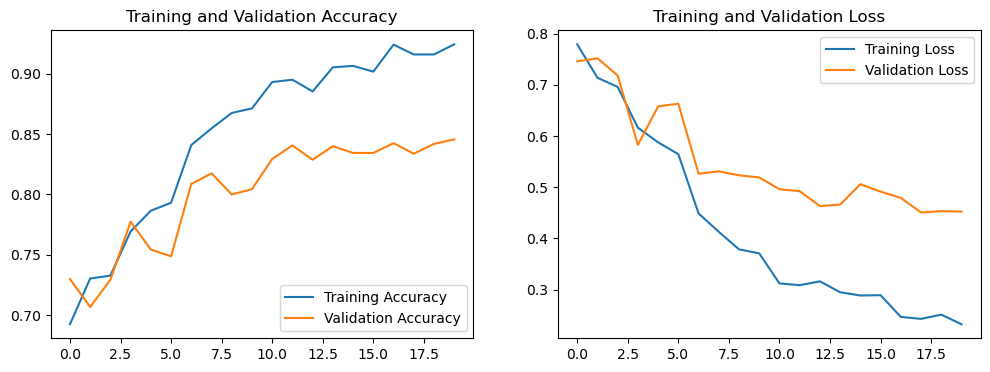

Evaluate on test data
94/94 [==============================] - 17s 184ms/step - loss: 0.4731 - accuracy: 0.8413
test loss, test acc: [0.47309860587120056, 0.8413333296775818]
94/94 [==============================] - 18s 186ms/step
              precision    recall  f1-score   support

   buildings       0.13      0.13      0.13       437
      forest       0.16      0.17      0.17       474
     glacier       0.18      0.17      0.17       553
    mountain       0.17      0.17      0.17       525
         sea       0.18      0.18      0.18       510
      street       0.16      0.17      0.16       501

    accuracy                           0.17      3000
   macro avg       0.16      0.16      0.16      3000
weighted avg       0.16      0.17      0.16      3000

[[ 57  73  73  86  72  76]
 [ 61  80  91  83  81  78]
 [ 79  91  94  93 102  94]
 [ 71  75 101  87  86 105]
 [ 74  93  87  89  94  73]
 [ 82  74  89  81  92  83]]


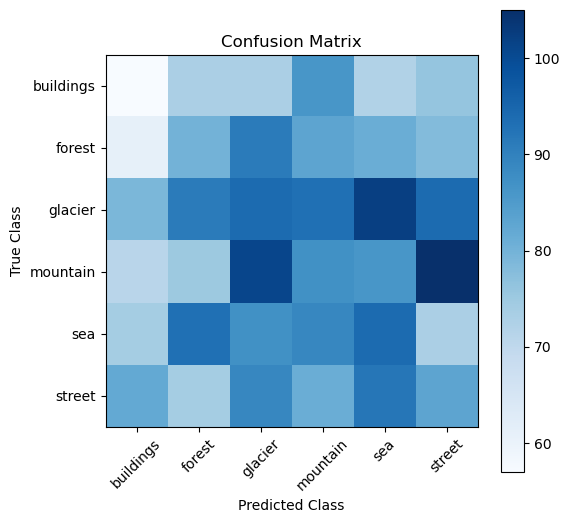

In [42]:
# Model Evaluation

# Plot the training and validation accuracy and loss at each epoch
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(20)
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

# Evaluate the model on the test data using `evaluate`
print("Evaluate on test data")
results = model.evaluate(test_generator)
print("test loss, test acc:", results)

# Get the predictions for the test data
predictions = model.predict(test_generator)

# Get the predicted class labels
predicted_classes = np.argmax(predictions, axis=1)

# Get the true labels
true_labels = test_generator.classes

# Get the class labels
class_labels = list(test_generator.class_indices.keys())

# Print the classification report
from sklearn.metrics import classification_report
report = classification_report(true_labels, predicted_classes, target_names=class_labels)
print(report)

# Print the confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(true_labels, predicted_classes)
print(cm)

# Plot the confusion matrix
plt.figure(figsize=(6, 6))
plt.imshow(cm, cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.colorbar()
tick_marks = np.arange(len(class_labels))
plt.xticks(tick_marks, class_labels, rotation=45)
plt.yticks(tick_marks, class_labels)
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.show()

